# Model Definition: Pareto Chart

A Pareto Chart is a combination of a bar graph and line graph used in Economics and Business that shows the influence that various (independent) categorical variables have on a continuous (dependent) variable in the dataset. The bars are ordered such that the most frequent or prominent independent variable is on the left and the least significant variable is on the right. The line graph represent the cumulative percentages of the dependent variable and how each independent variable contributes to that percentage.

This model is more of a tool that helps analyze different features and which of them should be prioritized; it is not used for estimating a value. Pareto Charts are good if you want to narrow down the features to find the most frequent/prominent  ones, so that you can focus on the ones that are the most impactful for the final product or for a certain variable.

A Pareto Chart can be applied to oil because it can be help us narrow down certain variables by seeing which ones affect cumulative oil production the most. From there, we can decide how to distribute resources in order to maximize production. 

## More information about the ANOVA correlation and interpretation of results towards the end of the notebook.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
#Import pareto package for Pareto Chart
from paretochart import pareto

In [70]:
#Import packages for ANOVA correlation
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg

In [71]:
#Print head of cleaned dataset
DatabaseDF = pd.read_csv("CleanedDataset.csv")
DatabaseDF.head()

,Unnamed: 0,Operator,Well Name,Formation,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs",...,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod,Completion Type,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
0,0,Operator 1,Well 1,MBH,5114.0,30.0,141,99,10,0.0,...,NaN,660.0,33.55,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
1,1,Operator 2,Well 2,MBH,5181.0,NaN,142,99,16,418000.0,...,NaN,660.0,27.62,NaN,NaN,NaN,NaN,NaN,NaN,2005.0
2,2,Operator 2,Well 3,MBH,4780.0,15.0,142,99,24,568407.0,...,NaN,660.0,11.19,OH,NaN,NaN,NaN,NaN,NaN,2006.0
3,3,Operator 1,Well 4,MBH,10654.0,1.0,142,99,1,845000.0,...,NaN,660.0,27.85,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
4,4,Operator 2,Well 5,MBH,5209.0,1.0,142,99,35,297366.0,...,NaN,660.0,50.88,OH,NaN,NaN,NaN,NaN,NaN,2006.0


In [75]:
#Replace all NaN values with string in order to do analysis
DatabaseDF['Completion Type'] = DatabaseDF['Completion Type'].fillna(0)
DatabaseDF['Completion Type'] = DatabaseDF['Completion Type'].replace(to_replace = 0, value = 'zero')

In [76]:
DatabaseDF.head()

,Unnamed: 0,Operator,Well Name,Formation,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs",...,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod,Completion Type,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
0,0,Operator 1,Well 1,MBH,5114.0,30.0,141,99,10,0.0,...,NaN,660.0,33.55,zero,NaN,NaN,NaN,NaN,NaN,2006.0
1,1,Operator 2,Well 2,MBH,5181.0,NaN,142,99,16,418000.0,...,NaN,660.0,27.62,zero,NaN,NaN,NaN,NaN,NaN,2005.0
2,2,Operator 2,Well 3,MBH,4780.0,15.0,142,99,24,568407.0,...,NaN,660.0,11.19,OH,NaN,NaN,NaN,NaN,NaN,2006.0
3,3,Operator 1,Well 4,MBH,10654.0,1.0,142,99,1,845000.0,...,NaN,660.0,27.85,zero,NaN,NaN,NaN,NaN,NaN,2007.0
4,4,Operator 2,Well 5,MBH,5209.0,1.0,142,99,35,297366.0,...,NaN,660.0,50.88,OH,NaN,NaN,NaN,NaN,NaN,2006.0


# Plotting completion and formation types and their counts simply to visualize the data.

In [77]:
#Print all unique completion types
DatabaseDF['Completion Type'].unique()

array(['zero', 'OH', 'Sleeves', 'P & P', 'Sleeves and P & P', 'Screen',
       'Cemented Liner', 'Perforated Liner', 'Frac Ports',
       'Frac Ports and P & P', 'Frac Ports and Repeater Ports', 'CT',
       'P & P and CT', 'Repeater Ports and P & P'], dtype=object)

In [78]:
#Count number of occurrences for each completion type
def count_compl(compare):
    count = 0
    for item in DatabaseDF['Completion Type']:
        if item == compare:
            count = count + 1
    return count

In [81]:
#Empty list for completion type counts
list_compl=[]

#List of completion types
completion_types = ['zero', 'OH', 'Sleeves', 'P & P', 'Sleeves and P & P', 'Screen',
       'Cemented Liner', 'Perforated Liner', 'Frac Ports',
       'Frac Ports and P & P', 'Frac Ports and Repeater Ports', 'CT',
       'P & P and CT', 'Repeater Ports and P & P']

#Function to create list for completion type counts
def create_list(completion_types):
    count = 0
    for item in completion_types:
        list_compl.append(count_compl(item))
        count = count + 1
    return list_compl

In [82]:
#Final list for completion type counts
type_count = create_list(completion_types)

In [83]:
#Create dataframe for Pareto Chart
df = pd.DataFrame({
    'Completion Type': completion_types,
    'Count': type_count[0:14]
})

In [84]:
#Function to plot pareto chart

def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

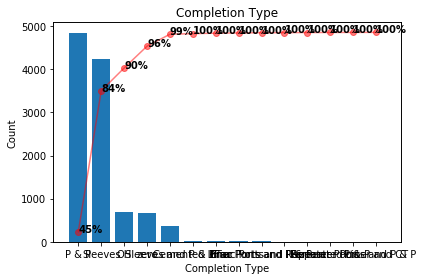

In [85]:
#Plot pareto chart for each completion type and its counts
pareto_plot(df, x='Completion Type', y='Count', title='Completion Type')

The P&P and Sleeves completion types seem to be the most frequent in the dataset, where P&P accounts for 45% of the completions and Sleeves accounts for 39% of the completions.

In [86]:
#Print all unique formations
DatabaseDF['Formation'].unique()

array(['MBH', 'TFH', 'MBH/TFH', 'TF2', 'TF4', 'TF3', nan, 'UTFH', 'TF1',
       'MTFH', 'TFSH', 'TF2.5'], dtype=object)

In [87]:
#Count number of occurrences for each formation type
def count_form(compare):
    count = 0
    for item in DatabaseDF['Formation']:
        if item == compare:
            count = count + 1
    return count

In [88]:
#Empty list for formation type counts
list_form=[]

#List of formation types
formation_types = ['MBH', 'TFH', 'MBH/TFH', 'TF2', 'TF4', 'TF3','UTFH', 'TF1',
       'MTFH', 'TFSH', 'TF2.5']

#Function to create list for formation type counts
def create_list(formation_types):
    count = 0
    for item in formation_types:
        list_form.append(count_form(item))
        count = count + 1
    return list_form

In [89]:
#Final list for formation type counts
form_count = create_list(formation_types)

In [90]:
#Create dataframe for Pareto Chart
df = pd.DataFrame({
    'Formation Type': formation_types,
    'Count': form_count
})

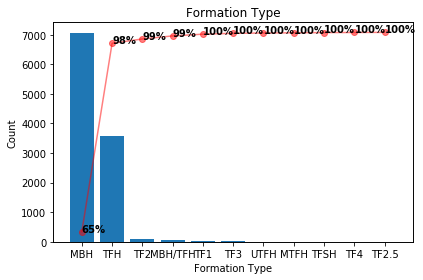

In [91]:
#Plot pareto chart for each formation type and its counts
pareto_plot(df, x='Formation Type', y='Count', title='Formation Type')

The MBH and TFH formation types seem to be the most frequent in the dataset, where MBH accounts for 65% of the formations and TFH accounts for 33% of the formations.

# Plotting Pareto Chart for both the completion types and formation types and how the types affect cumulative oil production.

In [93]:
#Create dataframe to work with for pareto chart
pareto_df = pd.DataFrame(DatabaseDF['Formation'])
pareto_df['12 month Cum Prod'] = DatabaseDF['12 month Cum Prod']
pareto_df['Completion Type'] = DatabaseDF['Completion Type']
pareto_df.head()

,Formation,12 month Cum Prod,Completion Type
0,MBH,33.55,zero
1,MBH,27.62,zero
2,MBH,11.19,OH
3,MBH,27.85,zero
4,MBH,50.88,OH


In [94]:
#Function to calculate value of cumulative oil production associated with each type of formation
def oil_prod(formation_string):
    count = 0
    oil_production = 0
    #Calculate number rows in dataframe
    num_rows = len(pareto_df.index) 
    for item in range(num_rows - 1):
        if pareto_df.at[item,'Formation'] == formation_string:
            count += 1
            oil_production += pareto_df.at[item,'12 month Cum Prod']
    return oil_production

In [95]:
#Append oil production values to list 
form_oilprod = []
for i in formation_types:
    form_oilprod.append(oil_prod(i))

In [96]:
#Create dataframe for Pareto Chart with formation types
df = pd.DataFrame({
    'Formation Type': formation_types,
    'Oil Production': form_oilprod
})

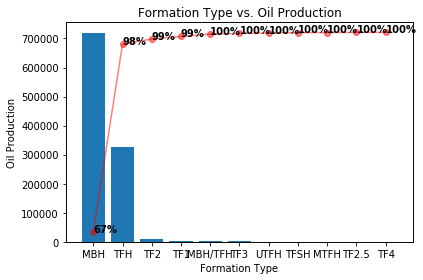

In [97]:
#Plot pareto chart for each formation type and how they are related to total oil production
pareto_plot(df, x='Formation Type', y='Oil Production', title='Formation Type vs. Oil Production')

The MBH and TFH formation types seem to be the most impactful on oil production in the dataset, where the MBH formation is associated with 67% of the cumulative production and TFH is associated with 31% of the cumulative production.

In [98]:
#Function to calculate value of cumulative oil production associated with each completion type
def oil_prod(completion_types):
    count = 0
    oil_production = 0
    num_rows = len(pareto_df.index) 
    for item in range(num_rows - 1):
        if pareto_df.at[item,'Completion Type'] == completion_types:
            count += 1
            oil_production += pareto_df.at[item,'12 month Cum Prod']
    return oil_production

In [99]:
#Append oil production values to list 
compl_oilprod = []
for i in completion_types:
    compl_oilprod.append(oil_prod(i))

In [100]:
#Create dataframe for Pareto Chart with completion types
df = pd.DataFrame({
    'Completion Type': completion_types,
    'Oil Production': compl_oilprod
})

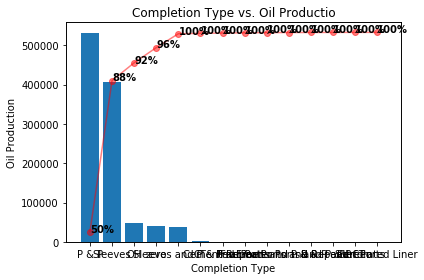

In [101]:
#Plot pareto chart for each completion type and how they are related to total oil production
pareto_plot(df, x='Completion Type', y='Oil Production', title='Completion Type vs. Oil Productio')

The P&P and Sleeves completion types seem to be the most impactful on the oil production in the dataset, where P&P is associated with for 50% of the cumulative production and Sleeves is associated with 38% of the cumulative production.

# ANOVA Correlation:

The SS value is the total sum of squares of deviations of all samples from the mean. It represents the total variation of all of the samples/observations.

The DF value is the sum of individual degrees of freedom for each sample; the degrees of freedom represents the number of independent values which can be assigned to a statistical distribution that can vary.

The MS value is the mean sum of squares due to the source; they are used to determine whether factors are significant. The treatment mean square is found by dividing SS by DF; it represent variation between sample means. The mean square error (MSE) is calculated by dividing SS of the residual error by DF; it represents variation within samples.

The F-statistic from the F-test is associated with the DF value. It based on the ratio of mean squares that are expected to be equal under the null hypothesis. In addition, it assesses the equality of variances. The more variability there is, the higher the F-statistic is.

The p-unc value represents the uncorrected p-values.

The np2 value represents the partial eta-square effect sizes. It describes a proportion of variability in a sample. It is a ratio between the SS of a factorr and SS of a specfic error term.

In [102]:
#Prepare data for ANOVA calculations for Completion Type
#Use pd.melt function to put data into readable format
d_melt1 = pd.melt(pareto_df, id_vars=['Completion Type'], value_vars=['12 month Cum Prod'])
d_melt1.columns = ['Completion Type', 'Cumulative Production', 'value']
d_melt1.head()

,Completion Type,Cumulative Production,value
0,zero,12 month Cum Prod,33.55
1,zero,12 month Cum Prod,27.62
2,OH,12 month Cum Prod,11.19
3,zero,12 month Cum Prod,27.85
4,OH,12 month Cum Prod,50.88


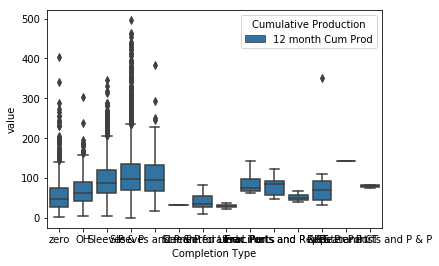

In [103]:
#Plot boxplot that shows distribution of production for each completion type
sns.boxplot(x="Completion Type", y="value", hue="Cumulative Production", data=d_melt1) 

In [46]:
#Calculate ANOVA correlation for completion type and cumulative oil production
aov_compltype = pg.anova(data=d_melt1, dv='value', between='Completion Type', detailed=True)
print(aov_compltype)

            Source            SS     DF             MS          F  \
0  Completion Type  1.273839e+06     12  106153.281558  38.717811   
1           Within  2.792439e+07  10185    2741.717021        NaN   

          p-unc       np2  
0  1.020588e-89  0.043627  
1           NaN       NaN  


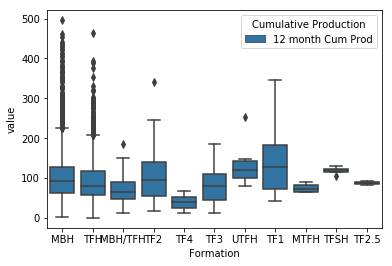

In [104]:
#Plot boxplot that shows distribution of production for each completion type
sns.boxplot(x="Formation", y="value", hue="Cumulative Production", data=d_melt2) 

In [105]:
#Prepare data for ANOVA calculations for Formation Type
#Use pd.melt function to put data into readable format
d_melt2 = pd.melt(pareto_df, id_vars=['Formation'], value_vars=['12 month Cum Prod'])
d_melt2.columns = ['Formation', 'Cumulative Production', 'value']
d_melt2.head()

,Formation,Cumulative Production,value
0,MBH,12 month Cum Prod,33.55
1,MBH,12 month Cum Prod,27.62
2,MBH,12 month Cum Prod,11.19
3,MBH,12 month Cum Prod,27.85
4,MBH,12 month Cum Prod,50.88


In [106]:
aov_formtype = pg.anova(data=d_melt2, dv='value', between='Formation', detailed=True)
print(aov_formtype)

      Source            SS     DF            MS          F         p-unc  \
0  Formation  3.724620e+05     10  37246.195727  12.848641  1.325887e-22   
1     Within  3.141476e+07  10837   2898.843110        NaN           NaN   

        np2  
0  0.011717  
1       NaN  


This model seems to have low deviation from the mean of all of the observations/samples but has a high variance value. 

A Pareto Chart may not be extremely successful with the features tested above, but it may be more successful with other variables. It has potential and can be helpful when doing dimensionality reduction and feature selection, since it prioritizes the most impactful variables.